In [1]:
import pandas as pd
import numpy as np


train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")
train_df.head()

test_df["Survived"] = np.nan
df = pd.concat([train_df, test_df], ignore_index=True)

In [2]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


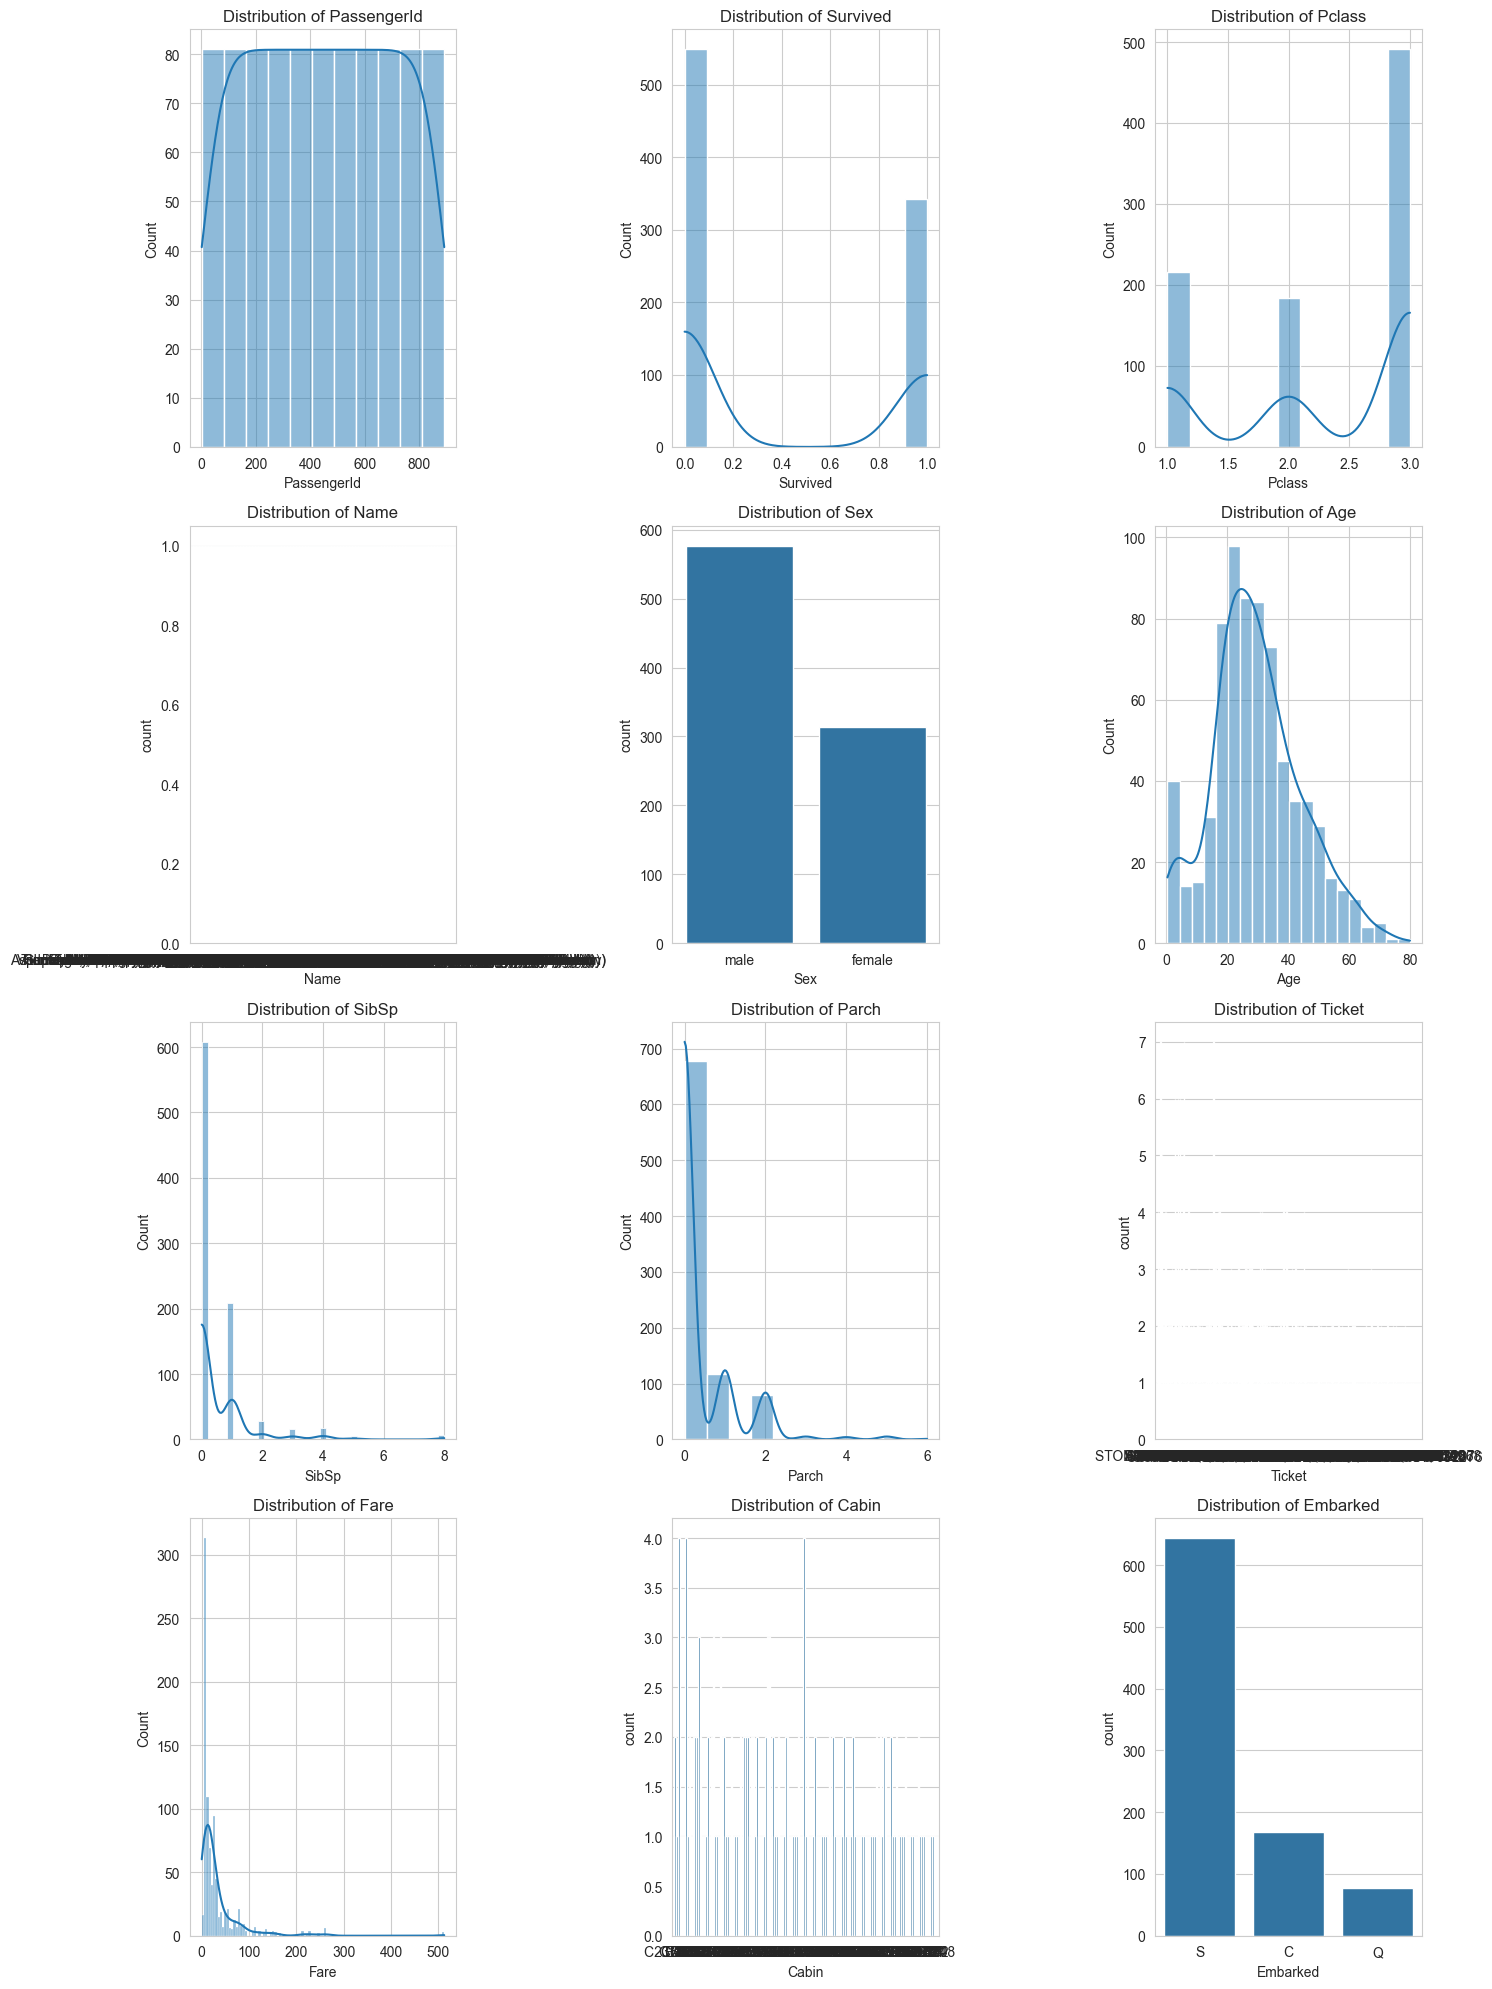

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))
axes = axes.flatten()

columns = train_df.columns

for i, col in enumerate(columns):
    if train_df[col].dtype == "object":
        sns.countplot(data=train_df, x=col, ax=axes[i])
    else:
        sns.histplot(data=train_df, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")

# Adjust layout
plt.tight_layout()
plt.show()

In [4]:
survived_counts = train_df['Survived'].value_counts().sort_index()
print("Survivedが0の人の数:", survived_counts[0])
print("Survivedが1の人の数:", survived_counts[1])


Survivedが0の人の数: 549
Survivedが1の人の数: 342


In [8]:
"""
家族判定
家族がいる人の割合
家族で16才以下または女性の生存率
家族で16才超えかつ男性の生存率
"""

# trainデータのみを使用
df_complete = df[df["Survived"].notna()].copy()

# グループ分け
df_complete["Group"] = df_complete.apply(
    lambda row: (
        "Female or Under 16"
        if ((pd.notnull(row["Age"]) and row["Age"] < 16) or row["Sex"] == "female")
        else "Male Adult"
    ),
    axis=1,
)

# 生存率の平均値
grouped_survival = df_complete.groupby("Group")["Survived"].mean()
print("Average Survival Rates by Group >>")
print(grouped_survival)

# グループの人数
grouped_count = df_complete.groupby("Group")["Survived"].count()
print("Number of passengers in each group >>")
print(grouped_count)

Average Survival Rates by Group >>
Group
Female or Under 16    0.717514
Male Adult            0.163873
Name: Survived, dtype: float64
Number of passengers in each group >>
Group
Female or Under 16    354
Male Adult            537
Name: Survived, dtype: int64


In [11]:
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
df["FamilySize"].value_counts()

FamilySize
1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: count, dtype: int64

In [6]:
# ------------ Surname ------------
# NameからSurname(苗字)を抽出
df["Surname"] = df["Name"].map(lambda name: name.split(",")[0].strip())

# 同じSurname(苗字)の出現頻度をカウント(出現回数が2以上なら家族)
df["FamilyGroup"] = df["Surname"].map(df["Surname"].value_counts())


# 家族で16才以下または女性の生存率
Female_Child_Group = df.loc[
    (df["FamilyGroup"] >= 2) & ((df["Age"] <= 16) | (df["Sex"] == "female"))
]
Female_Child_Group = Female_Child_Group.groupby("Surname")["Survived"].mean()
print(Female_Child_Group.value_counts())

# 家族で16才超えかつ男性の生存率
Male_Adult_Group = df.loc[
    (df["FamilyGroup"] >= 2) & (df["Age"] > 16) & (df["Sex"] == "male")
]
Male_Adult_List = Male_Adult_Group.groupby("Surname")["Survived"].mean()
print(Male_Adult_List.value_counts())

Survived
1.000000    113
0.000000     32
0.750000      2
0.500000      1
0.333333      1
0.142857      1
Name: count, dtype: int64
Survived
0.000000    101
1.000000     20
0.500000      4
0.333333      1
Name: count, dtype: int64
